In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 30
pd.options.display.max_rows = 1000

%matplotlib inline

In [182]:
from sklearn.ensemble import RandomForestClassifier

In [183]:
from datetime import datetime


In [184]:
import warnings
warnings.filterwarnings('ignore')

In [185]:
ins = pd.read_csv('training_data.csv')

In [186]:
out = pd.read_csv('test_data.csv')

In [187]:
ins.head(100)

,Unnamed: 0,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,0,39,self-employed,married,tertiary,0,1047,0,0,NaN,6,jun,1,-1,0,NaN,16:13:56,16:23:10,1
1,1,37,blue-collar,married,secondary,0,408,1,0,telephone,9,feb,9,-1,0,NaN,10:25:29,10:25:57,0
2,2,34,blue-collar,married,secondary,0,1454,1,0,cellular,11,feb,2,297,2,failure,10:44:06,10:47:57,1
3,3,64,housemaid,married,primary,0,768,0,0,cellular,15,jul,2,182,1,success,13:05:53,13:10:03,0
4,4,29,blue-collar,single,secondary,0,8079,0,1,cellular,10,jul,1,-1,0,NaN,10:18:50,10:21:41,0
5,5,45,blue-collar,married,primary,0,412,1,0,telephone,4,feb,5,265,13,failure,10:09:00,10:09:45,0
6,6,46,blue-collar,married,NaN,0,209,0,0,cellular,11,aug,2,-1,0,NaN,14:36:31,14:37:43,0
7,7,26,services,single,secondary,0,127,1,1,cellular,23,jul,3,-1,0,NaN,11:18:31,11:19:56,0
8,8,41,blue-collar,married,NaN,0,665,1,0,NaN,19,may,3,-1,0,NaN,09:28:16,09:30:38,0
9,9,41,housemaid,married,secondary,0,12,0,1,cellular,28,jul,3,-1,0,NaN,14:09:00,14:16:52,0


In [188]:
out.head()

,Unnamed: 0,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd
0,0,36,admin.,married,secondary,0,3268,0,0,cellular,9,apr,2,-1,0,NaN,17:35:10,17:42:19
1,1,43,services,married,primary,0,2567,1,0,cellular,14,may,1,360,2,failure,13:01:12,13:03:01
2,2,41,blue-collar,married,primary,0,0,0,0,cellular,31,jul,2,-1,0,NaN,16:27:58,16:28:20
3,3,34,technician,married,secondary,0,0,1,0,cellular,5,aug,2,2,3,success,10:51:19,10:55:10
4,4,44,management,married,tertiary,0,2365,0,1,cellular,26,may,3,-1,0,NaN,17:00:41,17:03:20


In [189]:
ins.shape

(3000, 19)

In [190]:
ins.dtypes

Unnamed: 0           int64
Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
Outcome             object
CallStart           object
CallEnd             object
CarInsurance         int64
dtype: object

0    1809
1    1191
Name: CarInsurance, dtype: int64


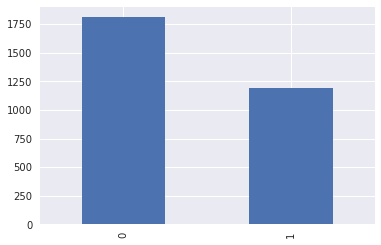

In [191]:
print(ins.CarInsurance.value_counts())
ins.CarInsurance.value_counts().plot(kind='bar')

In [192]:
ins.Outcome.value_counts()

failure    336
success    247
other      151
Name: Outcome, dtype: int64

In [193]:
ins.PrevAttempts.value_counts()

0     2266
1      260
2      201
3       97
4       50
5       46
6       18
7       17
8       13
10       7
9        6
14       5
13       4
12       4
23       1
18       1
19       1
58       1
11       1
30       1
Name: PrevAttempts, dtype: int64

In [194]:
del ins['Unnamed: 0']
del out['Unnamed: 0']

In [195]:
ins.CallStart = pd.DatetimeIndex(ins.CallStart)
ins.CallEnd = pd.DatetimeIndex(ins.CallEnd)

ins['CallLength'] = ins.CallEnd - ins.CallStart
ins.CallLength = [int(x.seconds)/60 for x in ins.CallLength]

ins['CallStart'] = [x.hour for x in ins.CallStart]

del ins['CallEnd']

#####

out.CallStart = pd.DatetimeIndex(out.CallStart)
out.CallEnd = pd.DatetimeIndex(out.CallEnd)

out['CallLength'] = out.CallEnd - out.CallStart
out.CallLength = [int(x.seconds)/60 for x in out.CallLength]

out['CallStart'] = [x.hour for x in out.CallStart]

del out['CallEnd']

In [196]:
ins['Insurance'] = ins.CarInsurance
del ins['CarInsurance']

AttributeError: 'DataFrame' object has no attribute 'CarInsurance'

In [197]:
ins.LastContactMonth.unique()

array(['jun', 'feb', 'jul', 'aug', 'may', 'apr', 'nov', 'jan', 'sep',
       'mar', 'oct', 'dec'], dtype=object)

In [198]:
months = [6,2,7,8,5,4,11,1,9,3,10,12]
months = dict(zip(ins.LastContactMonth.unique(), months))

ins.LastContactMonth = ins.LastContactMonth.map(months)

out.LastContactMonth = out.LastContactMonth.map(months)

In [199]:
from sklearn.preprocessing import LabelEncoder

for col in ins:
    if ins[col].dtype == 'O':
        ins[col][pd.isnull(ins[col])] = 'NaN'
        ins[col] = LabelEncoder().fit_transform(ins[col])
        
        
for col in out:
    if out[col].dtype == 'O':
        out[col][pd.isnull(out[col])] = 'NaN'
        out[col] = LabelEncoder().fit_transform(out[col])

In [200]:
ins.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallLength,Insurance
0,39,7,1,3,0,1047,0,0,0,6,6,1,-1,0,0,16,9.233333,1
1,37,2,1,2,0,408,1,0,2,9,2,9,-1,0,0,10,0.466667,0
2,34,2,1,2,0,1454,1,0,1,11,2,2,297,2,1,10,3.850000,1
3,64,4,1,1,0,768,0,0,1,15,7,2,182,1,3,13,4.166667,0
4,29,2,2,2,0,8079,0,1,1,10,7,1,-1,0,0,10,2.850000,0


In [201]:
out.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallLength
0,36,1,1,2,0,3268,0,0,1,9,4,2,-1,0,0,17,7.150000
1,43,8,1,1,0,2567,1,0,1,14,5,1,360,2,1,13,1.816667
2,41,2,1,1,0,0,0,0,1,31,7,2,-1,0,0,16,0.366667
3,34,10,1,2,0,0,1,0,1,5,8,2,2,3,3,10,3.850000
4,44,5,1,3,0,2365,0,1,1,26,5,3,-1,0,0,17,2.650000


In [202]:
for x in ins.columns:
    print(x, ins[x].isnull().sum())

Age 0
Job 0
Marital 0
Education 0
Default 0
Balance 0
HHInsurance 0
CarLoan 0
Communication 0
LastContactDay 0
LastContactMonth 0
NoOfContacts 0
DaysPassed 0
PrevAttempts 0
Outcome 0
CallStart 0
CallLength 0
Insurance 0


In [216]:
X = ins.iloc[:,:-1]
y = ins.iloc[:,-1]

In [217]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=7)

In [218]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[10,100],
         'criterion':['gini','entropy'],
         'max_depth':[3,10,100],
         'min_samples_split':[5,50,100],
         'class_weight':[None, 'balanced']}

rf = GridSearchCV(RandomForestClassifier(verbose=True), param_grid=params)
rf = rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

In [222]:
from sklearn.model_selection import GridSearchCV

params = {'max_features':['auto', 'log2', 0.5, None],
         'max_depth':[10,50,100],
         'min_samples_split':[5,50,100]}

rf = GridSearchCV(RandomForestClassifier(n_estimators=300, verbose=True), param_grid=params)
rf = rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

In [223]:
best_rf = rf.best_estimator_

In [224]:
best_rf.score(X_test,y_test)

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


0.82666666666666666

In [225]:
from sklearn.metrics import classification_report
print(classification_report(y_test, best_rf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.86      0.84      0.85       538
          1       0.78      0.80      0.79       362

avg / total       0.83      0.83      0.83       900



[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


In [226]:
from sklearn.model_selection import GridSearchCV

params = {'max_features':['auto', 'log2', 0.5, None],
         'max_depth':[10,50,100],
         'min_samples_split':[5,50,100]}

rf = GridSearchCV(RandomForestClassifier(n_estimators=300, verbose=True), param_grid=params)
rf = rf.fit(X, y)

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]

In [227]:
best_rf = rf.best_estimator_

In [228]:
out['Predicted'] = best_rf.predict(out.iloc[:,:])

out.head()

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallLength,Predicted
0,36,1,1,2,0,3268,0,0,1,9,4,2,-1,0,0,17,7.150000,1
1,43,8,1,1,0,2567,1,0,1,14,5,1,360,2,1,13,1.816667,0
2,41,2,1,1,0,0,0,0,1,31,7,2,-1,0,0,16,0.366667,0
3,34,10,1,2,0,0,1,0,1,5,8,2,2,3,3,10,3.850000,1
4,44,5,1,3,0,2365,0,1,1,26,5,3,-1,0,0,17,2.650000,0


In [238]:
out.Predicted.to_csv('JAZ.csv')

In [ ]:
pd.to_csv('')

In [236]:
print('\n'.join(list(out.Predicted)))

TypeError: sequence item 0: expected str instance, numpy.int64 found

In [234]:
with open('JAZ.txt','w') as f:
    f.write('\n'.join(list(out.Predicted)))

TypeError: sequence item 0: expected str instance, numpy.int64 found